Exercise 1 (L1):

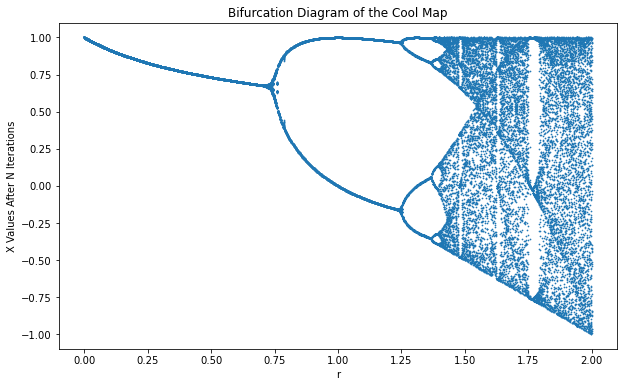

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def cool_map(r, x):
    return   1 - r*(x**2) #henon fixed y

def generate_bifurcation_diagram(r_values, iterations, transient):
    graph = []
    for r in r_values:
        x = np.random.randint(0, 990) 
        x = x / 1000.0   # Initial x value
        for _ in range(transient):
            x = cool_map(r, x)  # Discard transient steps, getting to Xn for some n high enough.
        for _ in range(iterations):
            x = cool_map(r, x)
            graph.append([r, x])
    return np.array(graph)

# Parameters
r_min = 0
r_max = 2
num_points = 1000
iterations = 50
transient = 100



# Generate bifurcation diagram
r_values = np.linspace(r_min, r_max, num_points)
bifurcation_data = generate_bifurcation_diagram(r_values, iterations, transient)

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.5, c='C0')
plt.xlabel("r")
plt.ylabel("X Values After N Iterations")
plt.title("Bifurcation Diagram of the Cool Map")
plt.show()

No Feigenbaum Constant.

.
.
.
.
.
.
.
.
.
.
.
.

Exercicse 2: Lyapunov Exponents of Lorenz System

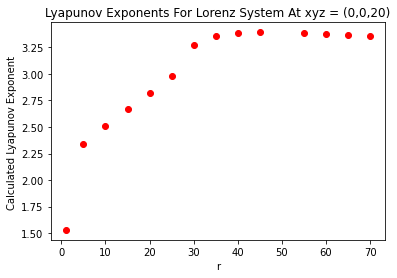

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

class Summary:
    def __init__(self, xyz, r_values, lyapunov_values):
        self.xyz = xyz
        self.r_values = r_values
        self.lyapunov_values = lyapunov_values

# Define the Lorenz system equations
def lorenz_system(t, xyz, r):
    x, y, z = xyz
    dxdt = -r * (x - y)
    dydt = -x * z + r * x - y
    dzdt = x * y - z
    return np.array([dxdt, dydt, dzdt])

# Function to calculate the Lyapunov exponents for different r values at fixed xyz
def calculate_lyapunov_exponents(r_values, xyz):
    lyapunov_exp_list = []
    
    for r in r_values:
        # Fix r in lorenz_system
        lorenz_r = lambda t, xyz_: lorenz_system(t, xyz_, r)
        
        # Set perturbation vectors
        e = [np.array([1e-6, 0, 0]), np.array([0, 1e-6, 0]), np.array([0, 0, 1e-6])]
        
        # Time span of numerical solution
        t_span = [0, 100]  
        
        # Solve the Lorenz system for the r value at xyz
        sol_r = solve_ivp(lorenz_r, t_span, xyz, dense_output=True)
        
        # List to store Lyapunov exponents calculated from each basis perturbation
        lyapunov_exp_r_spect = []
        
        for i in range(3):
            # Perturb initial value with e[i] and find perturbed sol
            xyzP = xyz + e[i]
            perturbed_sol = solve_ivp(lorenz_r, t_span, xyzP, dense_output=True)
                    
            # Define phase space difference between the two solutions at all time steps, including initial (D_0)
            D_0 = np.linalg.norm(np.append(xyz, lorenz_r(0,xyz)) - np.append(xyzP, lorenz_r(0, xyzP)))
            D = []
            
            for j in range(1, len(sol_r.t)):
                t = sol_r.t[j]
                xyz_t = sol_r.y[:, j]
                xyzP_t = perturbed_sol.y[:, j]
                
                D_i = np.linalg.norm(np.append(xyz_t, lorenz_r(0, xyz_t)) - np.append(xyzP_t, lorenz_r(0, xyzP_t)))
                D.append(D_i)
                    
            # Calculate Lyapunov exponent for each time
            L_t = []
            for k in range(len(D)):
                t = sol_r.t[k+1]
                L_tk = np.log(D[k] / D_0) / t
                L_t.append(L_tk)
                
            # Take mean exponents calculated from each time and set that to the Lyapunov exponent for this perturbation
            lyapunov_exp_r_spect.append(np.mean(L_t))
        
        lyapunov_exp_r = max(lyapunov_exp_r_spect)
        lyapunov_exp_list.append(lyapunov_exp_r)
    
    results = Summary(xyz, r_values, lyapunov_exp_list)
    
    return results

test = calculate_lyapunov_exponents([1,5,10,15,20,25,30,35,40,45,55,60,65,70], np.array([0, 0, 20]))


# Plotting
plt.plot(test.r_values, test.lyapunov_values, marker='o', linestyle='none', color='red')

plt.xlabel('r')
plt.ylabel('Calculated Lyapunov Exponent ')
plt.title('Lyapunov Exponents For Lorenz System At xyz = (0,0,20)')

# Display the plot
plt.show()



.
.
.
.
.
.
.
.
.
.
.

Exercise 3: Henon Visual

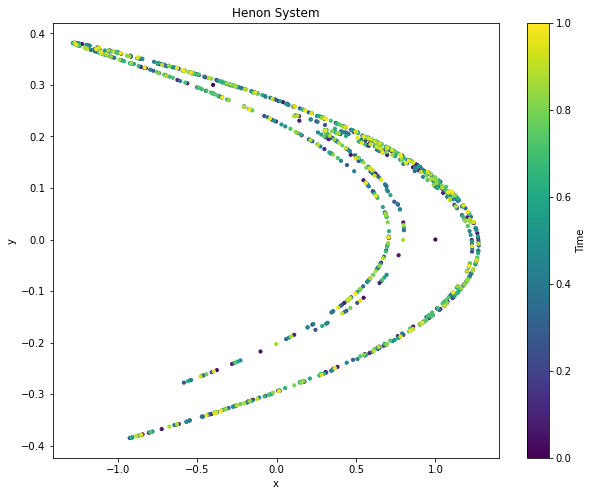

In [3]:
def henon_system(t, xy, a=1.4, b=0.3):
    x, y = xy
    
    x_ = y + 1 - a * x ** 2
    y_ = b * x
    return np.array([x_, y_])

def time_evolution(f, xy_0, t_final ):
    X = [xy_0[0]]
    Y = [xy_0[1]]
    
    for i in range(t_final):
        xy_i = f(0, [X[i], Y[i]])
        
        X.append(xy_i[0])
        Y.append(xy_i[1])
        
    return [X, Y]


# Set initial conditions
xy_0 = np.array([1, 0]) 

# Time span of numerical solution
t_final = 1000


# Solve the Henon System for time span
results = time_evolution(henon_system, xy_0, t_final)

#Set time values for color plot
t_values = []
for i in range(len(results[0])):
    t_values.append(i)
    
t_values = np.array(t_values) / t_final

# Plotting

lim_results = [results[0][-100:], results[1][-100:]]

plt.figure(figsize=(10, 8))
plt.scatter(results[0], results[1], c=t_values, cmap='viridis', s=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Henon System')
plt.colorbar(label='Time')



plt.show()




Exercise 4: Fractal Dimension of Menger Sponge

In [4]:
# Each cube is broken into 9 peices so label these peices with ijk coordinates.
# The peices being removed are those with coordinate=1 for two of ijk

# Set the first level template
def level_1(): 
    level1 = np.ones((3, 3, 3), dtype=np.uint8) 
    for i in range(3):
        for j in range(3):
            for k in range(3):
                index = 0
                if i == 1:
                    index = index + 1
                if j == 1:
                    index = index + 1
                if k == 1:
                    index = index + 1
                if index > 1:
                    level1[i,j,k] = 0
    return level1
# convert to variable
level_1 = level_1()

# Recursive function for generating Menger Sponge of level n
def generate_menger_sponge(level):
    # Base case: Level 0 returns a single cube
    if level == 0:
        return np.array([1])
    if level == 1:
        return level_1

    # Recursive case
    # Generate new array called "new_level" with side length 3 times previous
    previous_level = generate_menger_sponge(level - 1)
    previous_size = previous_level.shape[0]
    new_size = previous_size*3
    new_level = np.zeros((new_size, new_size, new_size), dtype=np.uint8)
    
    # To each cube in the old level, associate a 3x3x3 cube of zeros in the new level and adjust the new cube 
    # of cubes accordingly
                    
    for i in range(previous_size):
        for j in range(previous_size):
            for k in range(previous_size):
                if previous_level[i,j,k] == 1:
                    new_level[3*i:3*i+3, 3*j:3*j+3, 3*k:3*k+3] = level_1
                    
    return new_level

s = generate_menger_sponge(2)
print(s)

[[[1 1 1 1 1 1 1 1 1]
  [1 0 1 1 0 1 1 0 1]
  [1 1 1 1 1 1 1 1 1]
  [1 1 1 0 0 0 1 1 1]
  [1 0 1 0 0 0 1 0 1]
  [1 1 1 0 0 0 1 1 1]
  [1 1 1 1 1 1 1 1 1]
  [1 0 1 1 0 1 1 0 1]
  [1 1 1 1 1 1 1 1 1]]

 [[1 0 1 1 0 1 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 1 0 1 1 0 1]
  [1 0 1 0 0 0 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 0 0 0 1 0 1]
  [1 0 1 1 0 1 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 1 0 1 1 0 1]]

 [[1 1 1 1 1 1 1 1 1]
  [1 0 1 1 0 1 1 0 1]
  [1 1 1 1 1 1 1 1 1]
  [1 1 1 0 0 0 1 1 1]
  [1 0 1 0 0 0 1 0 1]
  [1 1 1 0 0 0 1 1 1]
  [1 1 1 1 1 1 1 1 1]
  [1 0 1 1 0 1 1 0 1]
  [1 1 1 1 1 1 1 1 1]]

 [[1 1 1 0 0 0 1 1 1]
  [1 0 1 0 0 0 1 0 1]
  [1 1 1 0 0 0 1 1 1]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [1 1 1 0 0 0 1 1 1]
  [1 0 1 0 0 0 1 0 1]
  [1 1 1 0 0 0 1 1 1]]

 [[1 0 1 0 0 0 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 0 0 0 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 0 0 0 1 0 1]
  [0 0 0 0 0 0 0 0 0]
  [1 0 1 0 0 0 1 0 1]]



graph x,y =  [array([  3,   9,  27,  81, 243]), array([2.72683303, 2.72683303, 2.72683303, 2.72683303, 2.72683303])]


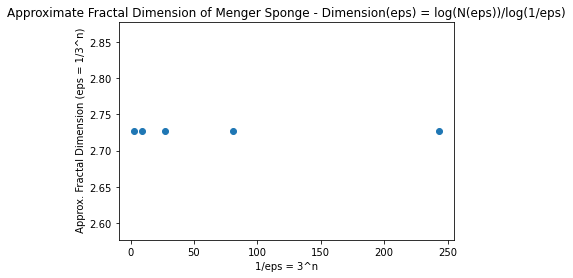

Thus,  the fractal dimension of the Menger Sponge appears to be about 2.72683303


In [9]:
# FIND FRACTAL DIMENSION, assume the original cube has side length 1
# Consider boxes of side length 1/(3^n) as n ---> infinity
# For each n, the resolution of sponge needed to calculate covering number N is level n
# Plot log(N(epsilon))/log(1/epsilon) as a function of 1/epsilon and look for limit

def find_number_of_boxes(level_n):
    sponge = generate_menger_sponge(level_n)
    return np.sum(sponge)


def graph_dim(n_max):
    
    one_over_eps = []
    Log_eps = []
    Log_N_eps = []
    
    Ni = 0
    for i in range(1, n_max+1):
        one_over_eps.append(3**i)
        N_i = find_number_of_boxes(i)
        Log_eps.append(math.log(3**i))
        Log_N_eps.append(math.log(N_i))
        
    Dim_eps = np.array(Log_N_eps)/np.array(Log_eps)
    one_over_eps = np.array(one_over_eps)
    
    return[one_over_eps, Dim_eps]


graph_n = graph_dim(5)
print('graph x,y = ', graph_n)


# Plotting
plt.scatter(graph_n[0], graph_n[1])

plt.xlabel('1/eps = 3^n')
plt.ylabel(' Approx. Fractal Dimension (eps = 1/3^n)')
plt.title('Approximate Fractal Dimension of Menger Sponge - Dimension(eps) = log(N(eps))/log(1/eps)')

plt.show()


print('Thus,  the fractal dimension of the Menger Sponge appears to be about 2.72683303')
        

Homemade Dynamical System: Happiness Propogation Through Human Network

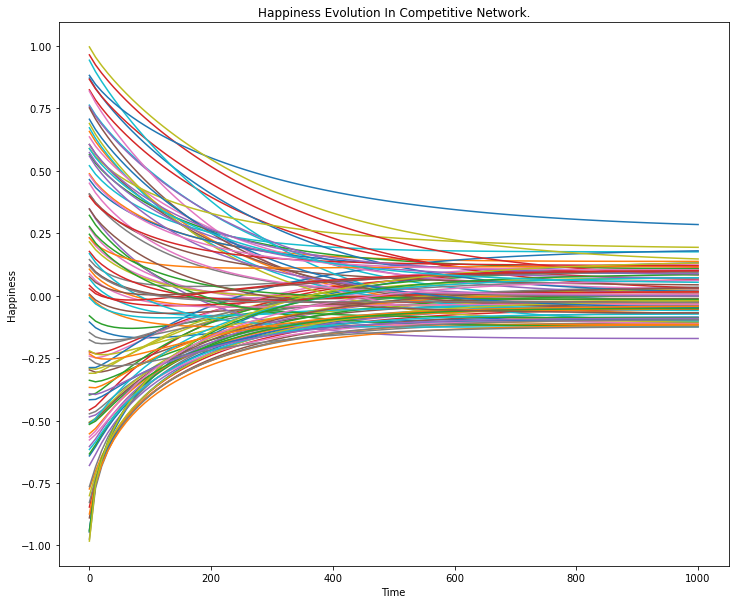

In [6]:
n = 100  # Number of people in the network

# Generate random initial happiness conditions:
x = 2*np.random.rand(n) - 1 #changing initial range changes things
#x = [-0.9 for i in range(n)]
# Generate a random connection matrix of shape (n, n)
g_ker = np.random.rand(n, n)
g = (g_ker + g_ker.T)/2

def te (t, x, g=g):
    E = np.sum(x)
    f_ = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            f_[i][j] = (x[i]+1)/2*g[i][j]/(x[j]+1.000001) + ((x[i]+1)/2)*g[i][j]
            
    f = f_ / np.sum(f_)
    dx = []
    for j in range(n):
        dx_j = [f[i][j] for i in range(n)]
        dx.append(np.sum(dx_j))
        
    sum_d = np.sum(dx)
    dx = dx - (sum_d/n)
    #print(dx)
    return  dx #+ np.random.rand(n)/100 -.005


t_span = [0,1000]
t_eval = np.linspace(t_span[0], t_span[1], 100)
sol = solve_ivp(te, t_span, x, t_eval=t_eval, dense_output=True)
t = np.linspace(t_span[0], t_span[1], 100)
sol_x = sol.sol(t)

plt.figure(figsize=(12,10))
plt.plot(t,sol_x.T)

plt.ylabel('Happiness')
plt.xlabel('Time')
plt.title('Happiness Evolution In Competitive Network.')
plt.show()